In [49]:
import cv2
import os
import pandas as pd
import numpy as np

from pathlib import Path
from matplotlib import pyplot as plt

In [52]:
MASK_DIR_PATH = "segments"
RATIO_FILE_PATH = "tables/ratio.csv"

CHANNEL_MAX = 3
THRESH = 30
BLUR_KERNEL = 26
CONTOUR_COLOUR = (230, 0, 0)
CONTOUR_THICKNESS = 20
MORPH_FORM = 7
T_LOWER = 30
T_UPPER = 200
ALL_EDGES = -1
WHITE = [255,255,255]

In [53]:
table_columns = {'ratio': [],
                 'name': []}

In [54]:
def prinf_info(whitePixelCount, real_area, area_ratio):
    print(f"Total mask pixels: {whitePixelCount} px")
    print(f"Real colorchecker area: {real_area} mm")
    print(f"Milimetre per pixel: {area_ratio} mm/px")
    
def save_to_file(table):
    table.to_csv(RATIO_FILE_PATH, index=False)

Total mask pixels: 3851561 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.04219688090793553 mm/px


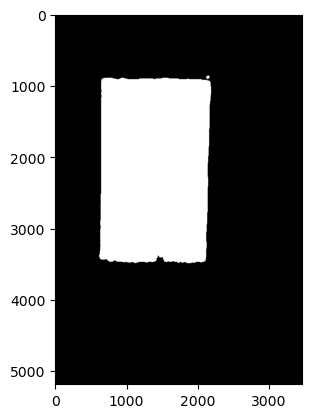

Total mask pixels: 4423664 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03937383110673952 mm/px


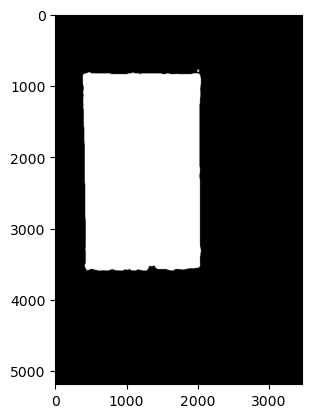

Total mask pixels: 4292677 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03997004476493276 mm/px


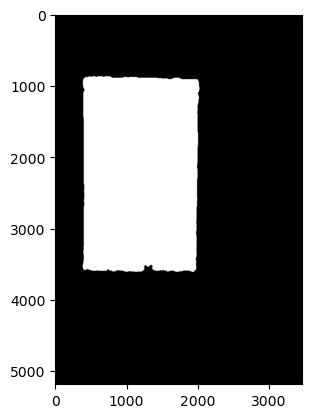

Total mask pixels: 4591207 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03864873675485001 mm/px


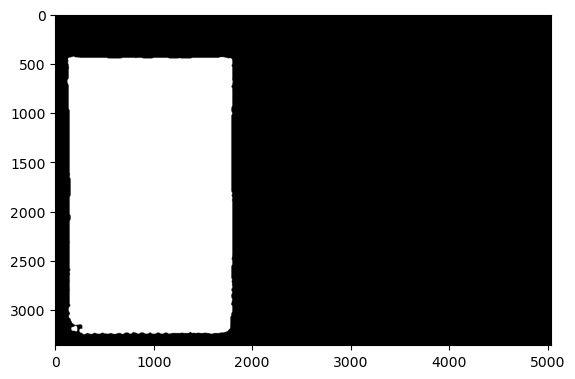

Total mask pixels: 5267263 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03608329912257457 mm/px


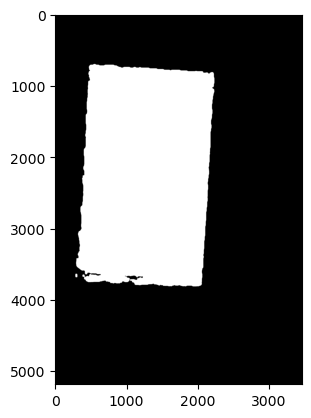

Total mask pixels: 3163413 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.04656083850973921 mm/px


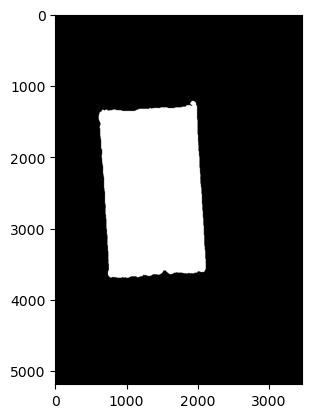

Total mask pixels: 4399425 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03948214882312904 mm/px


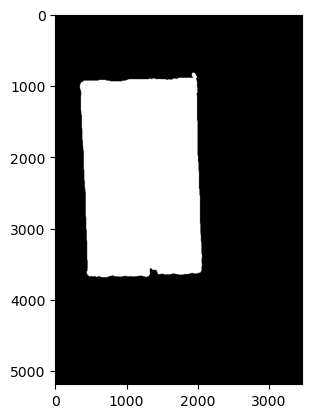

Total mask pixels: 4569206 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03874167300458767 mm/px


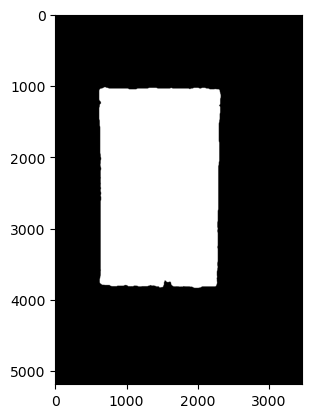

Total mask pixels: 4064277 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.04107779191691321 mm/px


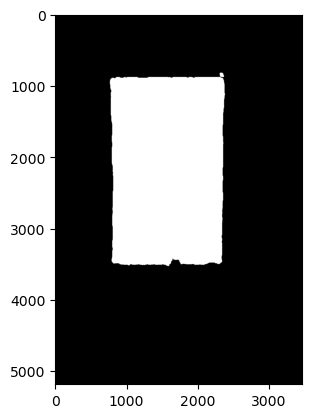

Total mask pixels: 4875153 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03750633388167396 mm/px


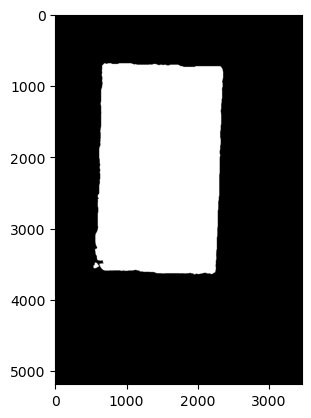

Total mask pixels: 5252798 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03613294752772791 mm/px


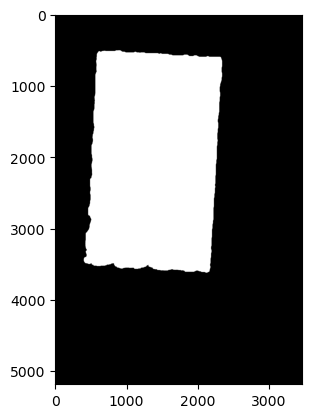

Total mask pixels: 4384170 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03955077950514527 mm/px


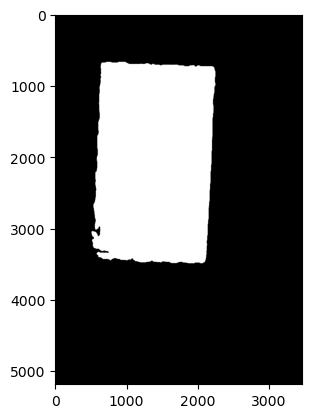

Total mask pixels: 4014118 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.0413336419311533 mm/px


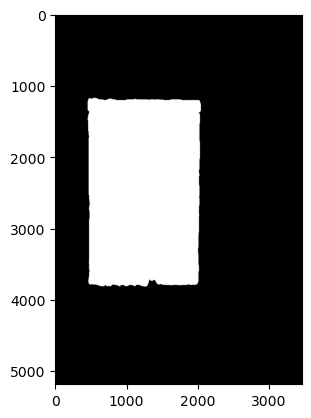

Total mask pixels: 4734107 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03806095714491773 mm/px


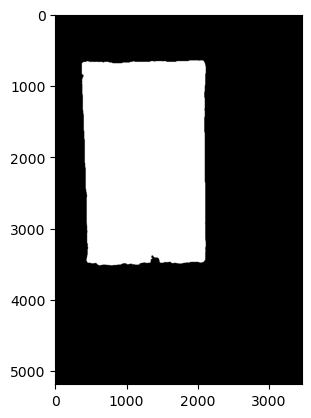

Total mask pixels: 3976033 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.04153113023727851 mm/px


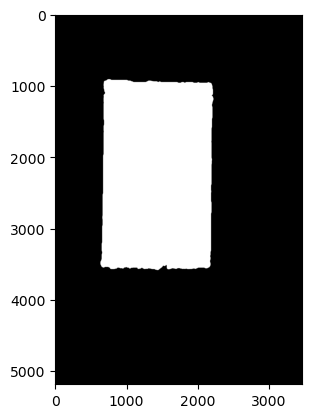

Total mask pixels: 4380011 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03956955259299694 mm/px


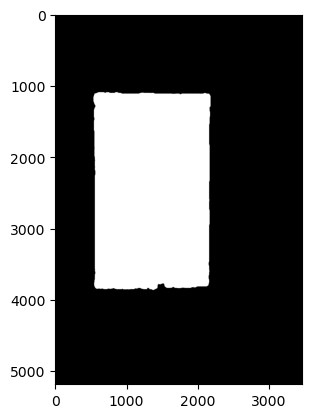

Total mask pixels: 4198875 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.0404140400416841 mm/px


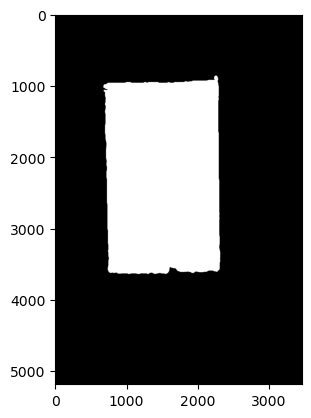

Total mask pixels: 4493451 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03906688060914202 mm/px


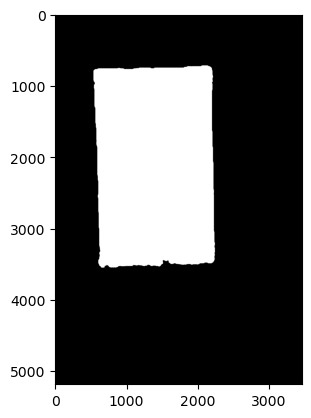

Total mask pixels: 3565454 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.04385724243429467 mm/px


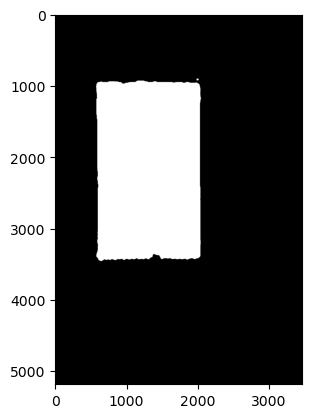

Total mask pixels: 4370776 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.03961133373158522 mm/px


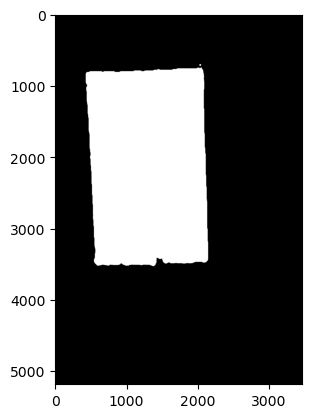

Total mask pixels: 5024681 px
Real colorchecker area: 6858.0 mm
Milimetre per pixel: 0.036944049107024785 mm/px


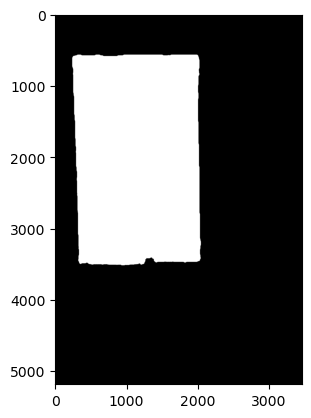

In [55]:
def main():
    table = pd.DataFrame(table_columns)

    for file in Path(MASK_DIR_PATH).glob('*.jpg'):
        img = cv2.imread(str(file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.blur(img,(BLUR_KERNEL, BLUR_KERNEL))
        threshold, img = cv2.threshold(img, THRESH, CHANNEL_MAX - 1, cv2.THRESH_BINARY)

        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (MORPH_FORM, MORPH_FORM))
        close = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel, iterations=1)

        edges, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.fillPoly(img, edges, WHITE)

        whitePixelCount = cv2.countNonZero(img)
        real_area = 63.5 * 108
        area_ratio = np.sqrt(real_area) / np.sqrt(whitePixelCount)
        
        row = []
        row.append(area_ratio)
        row.append(file.stem)
        
        table.loc[len(table.index)] = row
        
        prinf_info(whitePixelCount, real_area, area_ratio)

        plt.imshow(img, cmap="gray")
        plt.show()
        
    save_to_file(table)
    
if __name__== '__main__':
    main()